# Figure 3 - Ye et al. 2023

- Import dependencies and load the data

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

sns.set_style("ticks")

In [2]:
def plot_figure3c():
    # %%
    with open('../data/Figure3/ood_mice_zeroshot.pickle', 'rb') as f:
        pickle_obj = pickle.load(f)
    # %%
    proj_roots = list(pickle_obj.keys())
    proj_nicknames = ['smear mouse', 'ood maushaus', 'golden mouse']
    method_colors = plt.cm.get_cmap('magma_r', 6)

    fig, axes = plt.subplots(3, figsize=(4, 6))

    remove_nan = lambda x: x[~np.isnan(x)]
    dfs = []
    for i, proj_root in enumerate(pickle_obj):
        with_spatial_pyramid = np.nanmean(pickle_obj[proj_root]['with_spatial_pyramid']['RMSE'], axis=(1, 2))
        with_spatial_pyramid = remove_nan(with_spatial_pyramid)
        without_spatial_pyramid = np.nanmean(pickle_obj[proj_root]['without_spatial_pyramid']['RMSE'], axis=(1, 2))
        without_spatial_pyramid = remove_nan(without_spatial_pyramid)
        with_pyramid = ["without"] * len(without_spatial_pyramid) + ["with"] * len(with_spatial_pyramid)
        df_ = pd.DataFrame(
            np.array([
                np.r_[without_spatial_pyramid, with_spatial_pyramid],
                with_pyramid,
            ]).T,
            columns=['RMSE', 'cond'])
        df_['dataset'] = proj_nicknames[i]
        df_['RMSE'] = df_['RMSE'].astype("float64")
        df_['cond'] = df_['cond'].astype("category")
        df_['dataset'] = df_['dataset'].astype("category")
        dfs.append(df_)
        vp = sns.violinplot(
            df_, y='dataset', x='RMSE', hue='cond', split=True, hue_order=['without', 'with'],
            inner="quart", linewidth=1, palette={"without": ".85", "with": "#8AB5E7"},
            ax=axes[i], bw='scott',
        )
        sns.despine(ax=axes[i], left=True, top=True, right=True)
        axes[i].set_yticks([])
        axes[i].set_ylabel("")
        # axes[i].set_xlim(left=0)
    for i in (0, 1):
        axes[i].legend().remove()
    handles, labels = axes[2].get_legend_handles_labels()
    fig.legend(
        handles,
        ['Without spatial pyramid', 'With spatial pyramid'],
        frameon=False,
        ncol=1,
        # loc='lower right',
        fontsize='small',
        bbox_to_anchor=(0.9, 0.2),
    )
    axes[2].legend().remove()
    fig.savefig('Figure3c.png', dpi=600, bbox_inches='tight', pad_inches=0.05)

Plot distributions of detection errors with and without using spatial pyramid search

/var/folders/n5/5_x4w2px2wn6hc6n_9zzlygw0000gn/T/ipykernel_16374/2672746166.py:15: RuntimeWarning: Mean of empty slice
  with_spatial_pyramid = np.nanmean(pickle_obj[proj_root]['with_spatial_pyramid']['RMSE'], axis=(1, 2))
/var/folders/n5/5_x4w2px2wn6hc6n_9zzlygw0000gn/T/ipykernel_16374/2672746166.py:17: RuntimeWarning: Mean of empty slice
  without_spatial_pyramid = np.nanmean(pickle_obj[proj_root]['without_spatial_pyramid']['RMSE'], axis=(1, 2))


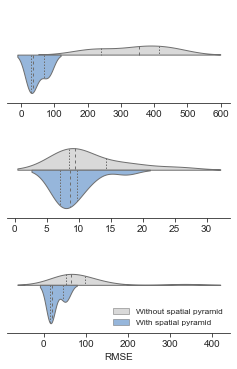

In [3]:
plot_figure3c()

In [4]:
def plot_figure3efgh():
    df = pd.read_hdf('../data/Figure3/video_adaptation_scores.h5')

    video_names = ['m3v1mp4',
                   'maushaus_short',
                   'smear_mouse',
                   'golden_mouse'
                   ]

    metrics = ['area_score']
    fig, axs = plt.subplots(4, figsize=(9, 8), dpi=600)
    snap_iters = range(0, 11000, 1000)
    snapshot_list = [1000, 1000, 1000, 10000]
    sizes = [100, 100, 20, 100]
    for i, video_name in enumerate(video_names):
        areas_pre = df.loc[video_name].loc['before_adapt'].loc[metrics[0]].loc['200000']
        areas_post = df.loc[video_name].loc['after_adapt'][metrics[0]].loc[f'{snapshot_list[i]}']

        axs[i].plot(areas_pre, c='dimgray', alpha=.5, label='w/o adaptation')
        axs[i].plot(areas_post, c='lightcoral', label='w/ adaptation')
        size = sizes[i]
        scalebar = AnchoredSizeBar(
           axs[i].transData,
           size=size,
           label=f'{size} frames',
           loc='lower center',
           frameon=False,
           borderpad=-1,
        )

        axs[i].set_xticklabels([])
        axs[i].xaxis.set_tick_params(length=0)
        axs[i].set_yticklabels([])
        axs[i].yaxis.set_tick_params(length=0)
        axs[i].add_artist(scalebar)
        sns.despine(ax=axs[i], top=True, right=True, left=True, bottom=True)
        axs[0].legend(frameon=False, loc='lower right')
    fig.savefig('Figure3efgh.png', dpi=600, bbox_inches='tight', pad_inches=0.05, transparent=True)

Changes in animal body area as a function of time

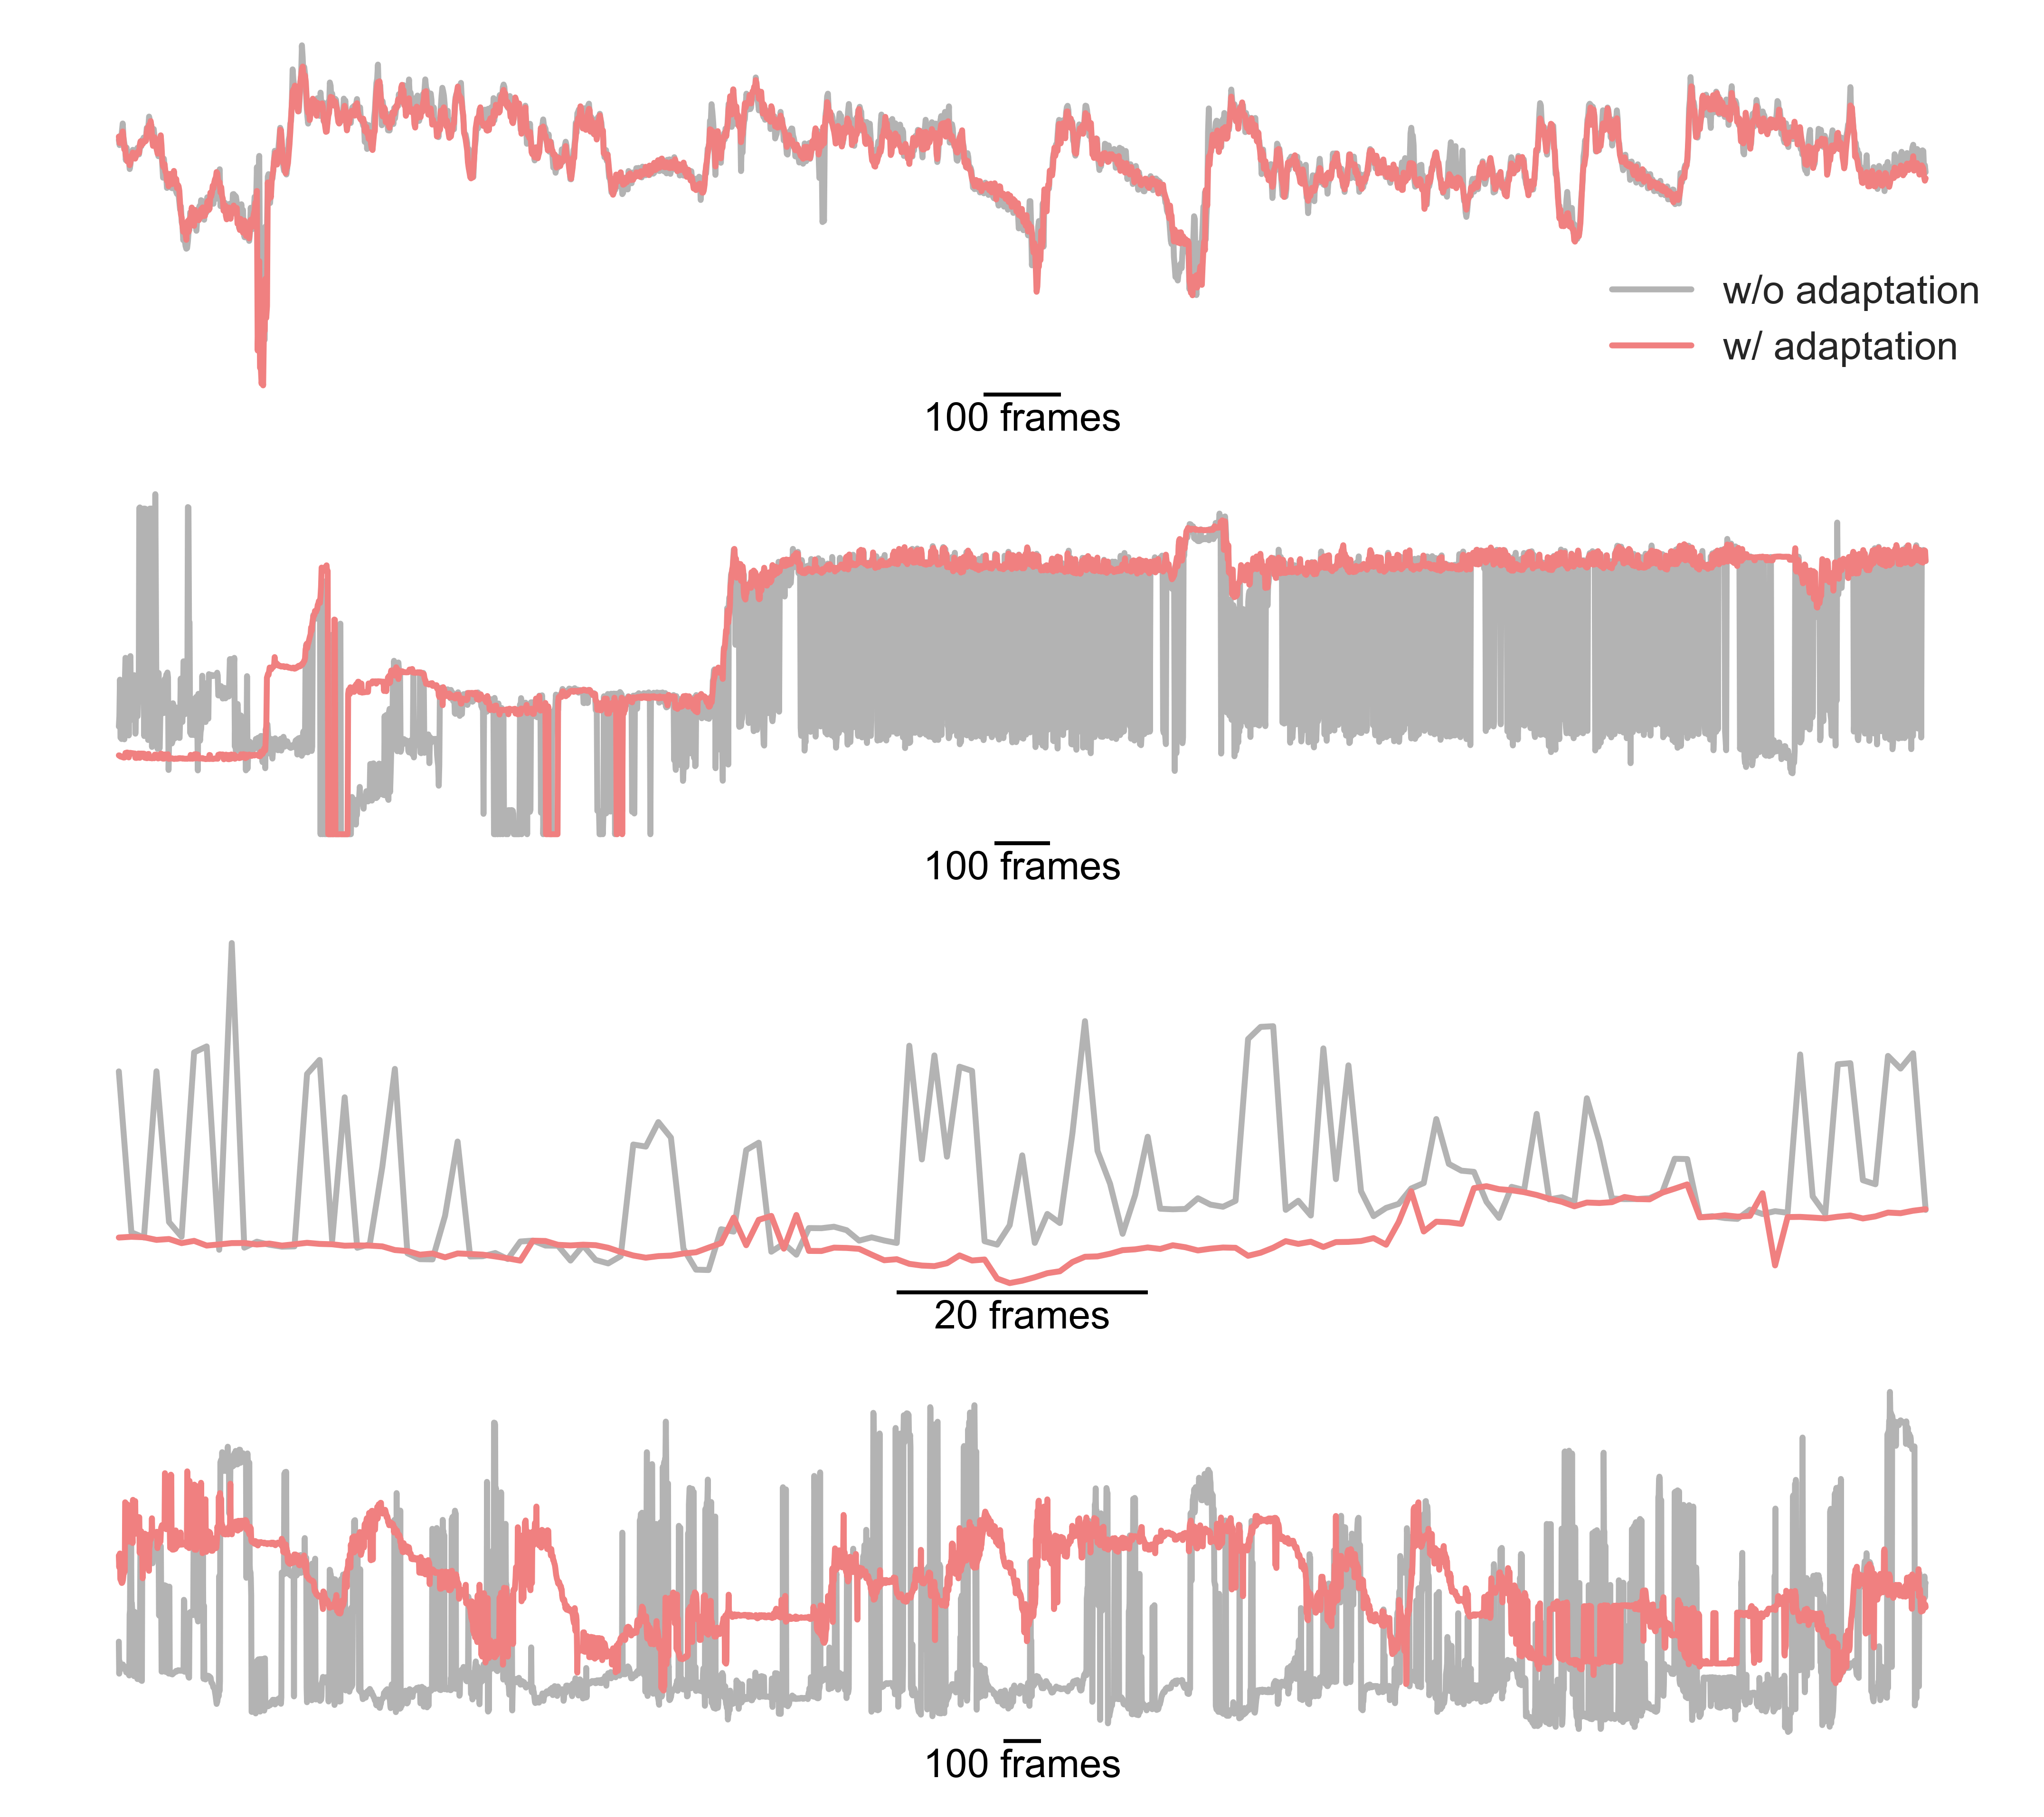

In [5]:
plot_figure3efgh()

In [6]:
quadruped_before_adapt = {'black_dog': '../data/Figure3/bbox_filtered_TD_videos/video_pred_black_dog/black_dog.mp4.json' ,
                          'elf': '../data/Figure3/bbox_filtered_TD_videos/video_pred_elf/elf.mp4.json'}

quadruped_post_adapt = {'black_dog': '../data/Figure3/bbox_filtered_TD_videos/black_dog_adapted_video_predict/black_dog.mp4.json' ,
                          'elf': '../data/Figure3/bbox_filtered_TD_videos/elf_adapted_video_predict/elf.mp4.json'}

filtered_quadruped_post_adapt = {'black_dog': '../data/Figure3/bbox_and_kpt_filtered_TD_videos/black_dog_adapted_video_predict/black_dog.mp4.json' ,
                          'elf': '../data/Figure3/bbox_and_kpt_filtered_TD_videos/elf_adapted_video_predict/elf.mp4.json'}




In [7]:
import matplotlib.pyplot as plt
import json
import numpy as np
def parse_json(json_path):
    with open(json_path, 'r') as f:
        obj = json.load(f)
        
    return obj

before_adapt_black_dog_obj = parse_json(quadruped_before_adapt['black_dog'])
before_adapt_elf_obj = parse_json(quadruped_before_adapt['elf'])
post_adapt_black_dog_obj = parse_json(quadruped_post_adapt['black_dog'])
post_adapt_elf_obj = parse_json(quadruped_post_adapt['elf'])
filtered_post_adapt_black_dog_obj = parse_json(filtered_quadruped_post_adapt['black_dog'])
filtered_post_adapt_elf_obj = parse_json(filtered_quadruped_post_adapt['elf'])

def get_keypoints_from_obj(obj):
    kpts_array = []
    for k,v in obj.items():
        keypoints = v[0]['keypoints']
        kpts_array.append(keypoints)
    return np.array(kpts_array)

before_adapt_black_dog_kpts = get_keypoints_from_obj(before_adapt_black_dog_obj)
before_adapt_elf_kpts = get_keypoints_from_obj(before_adapt_elf_obj)

post_adapt_black_dog_kpts = get_keypoints_from_obj(post_adapt_black_dog_obj)
post_adapt_elf_kpts = get_keypoints_from_obj(post_adapt_elf_obj)


filtered_post_adapt_black_dog_kpts = get_keypoints_from_obj(filtered_post_adapt_black_dog_obj)
filtered_post_adapt_elf_kpts = get_keypoints_from_obj(filtered_post_adapt_elf_obj)
        

In [8]:
import numpy as np
from scipy.spatial import ConvexHull

def compute_areas(keypoints):
    # Initialize array for areas
    areas = np.zeros(keypoints.shape[0])

    # For each frame
    for i in range(keypoints.shape[0]):
        # Get the keypoints for this frame
        frame_kpts = keypoints[i, :, :2]  # Ignoring the likelihood values

        # Compute the convex hull for the keypoints
        hull = ConvexHull(frame_kpts)

        # The area of the convex hull can be accessed directly
        areas[i] = hull.volume  # In 2D, 'volume' is actually area
    areas = np.sqrt(areas)
    return areas


square_root_areas_before_adapt_black_dog = compute_areas(before_adapt_black_dog_kpts)
square_root_areas_before_adapt_elf = compute_areas(before_adapt_elf_kpts)

square_root_areas_post_adapt_black_dog = compute_areas(post_adapt_black_dog_kpts)
square_root_areas_post_adapt_elf = compute_areas(post_adapt_elf_kpts)

square_root_areas_filtered_post_adapt_black_dog = compute_areas(filtered_post_adapt_black_dog_kpts)
square_root_areas_filtered_post_adapt_elf = compute_areas(filtered_post_adapt_elf_kpts)


In [9]:
def plot_adaptation_score_for_quadruped(data_pre, data_post,data_filtered_post, metric, videoname):


    fig, axs = plt.subplots(1, figsize=(9, 2), dpi=600)
    
    score_pre = data_pre
    score_post = data_post
    score_filered_post = data_filtered_post

    
    
    axs.plot(score_pre, c='dimgray', alpha=.5, label='w/o adaptation')    
    axs.plot(score_post, c='lightcoral', label='w/ adaptation')    
    axs.plot(score_filered_post, c='purple', label='w/ adaptation')

    scalebar = AnchoredSizeBar(
       axs.transData,
       size=100,
       label='100 frames',
       loc='lower center',
       frameon=False,
       borderpad=-1,
    )

    axs.set_xticklabels([])
    axs.xaxis.set_tick_params(length=0)
    axs.set_yticklabels([])
    axs.yaxis.set_tick_params(length=0)
    axs.add_artist(scalebar)
    sns.despine(ax=axs, top=True, right=True, left=True, bottom=True)
        
    #axs[0].legend(frameon=False, loc='lower right')
    fig.suptitle(f'{videoname}  {metric} score over time')
    fig.savefig(f'{videoname}_{metric}.png', dpi=400, bbox_inches='tight', pad_inches=0.05, transparent = True)

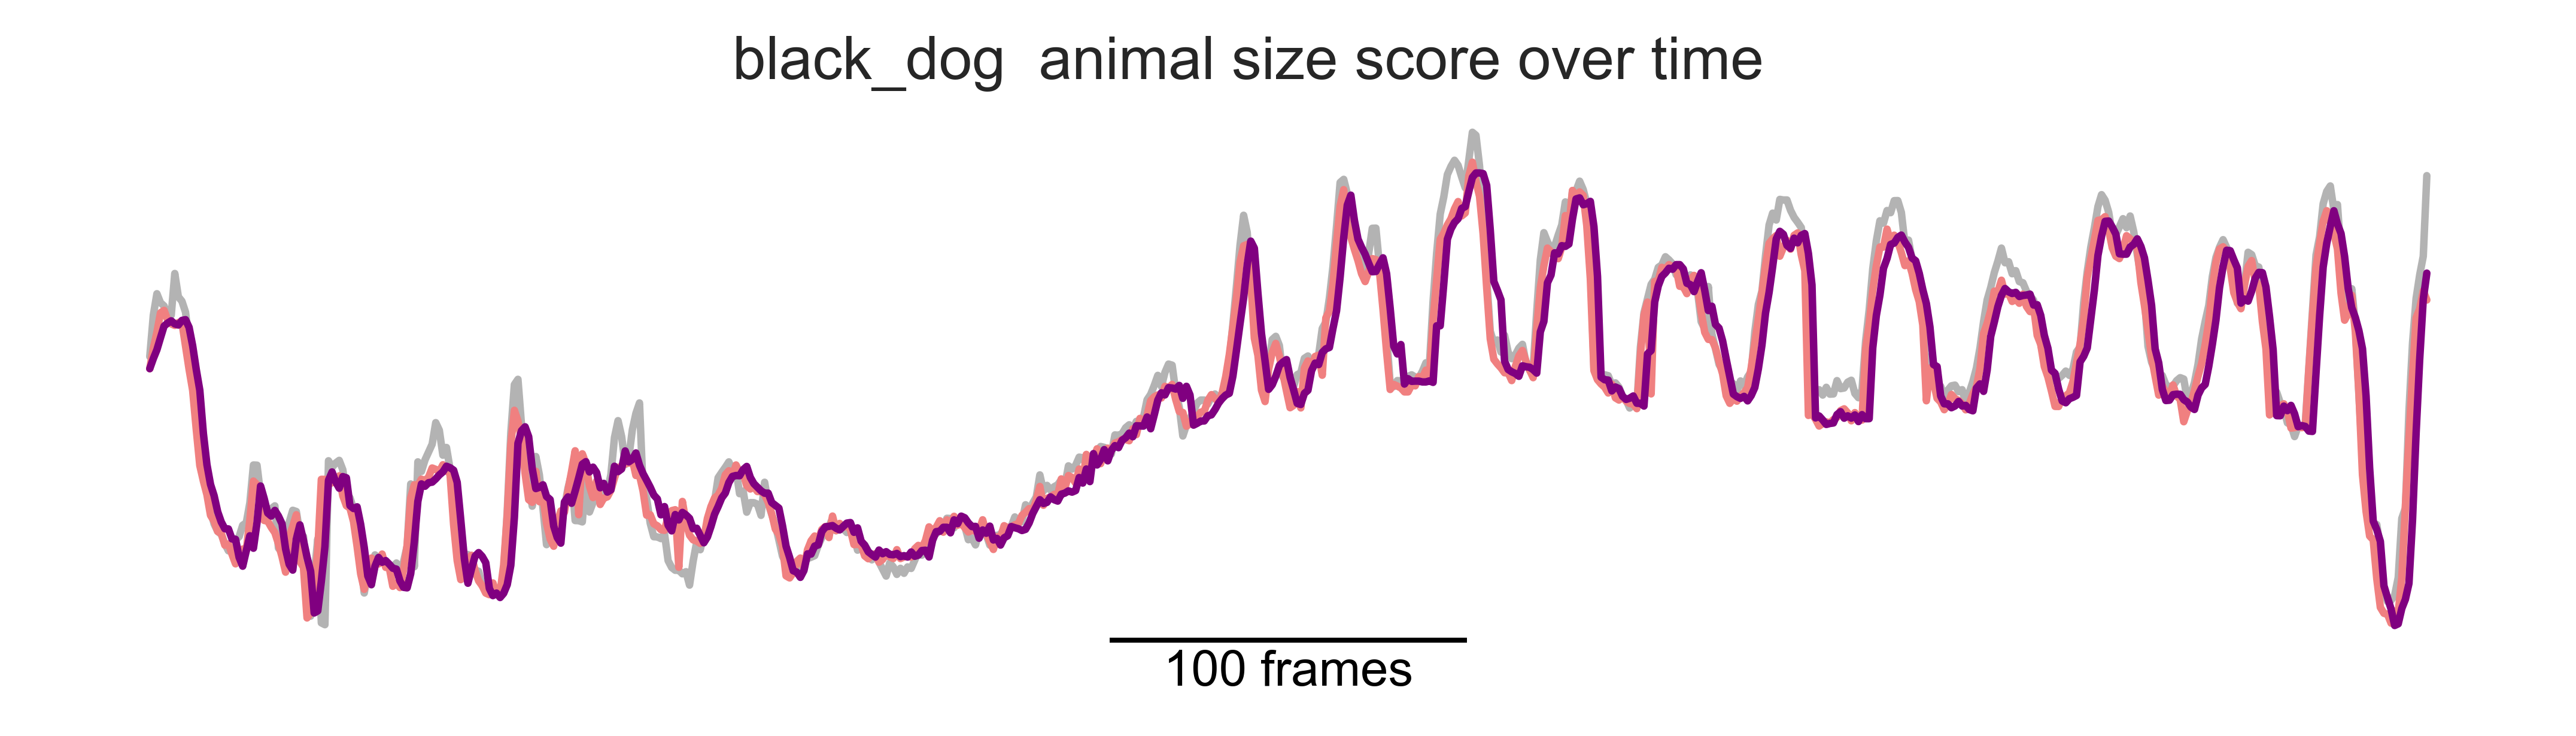

In [10]:
plot_adaptation_score_for_quadruped(square_root_areas_before_adapt_black_dog , square_root_areas_post_adapt_black_dog, square_root_areas_filtered_post_adapt_black_dog, 'animal size', 'black_dog' )


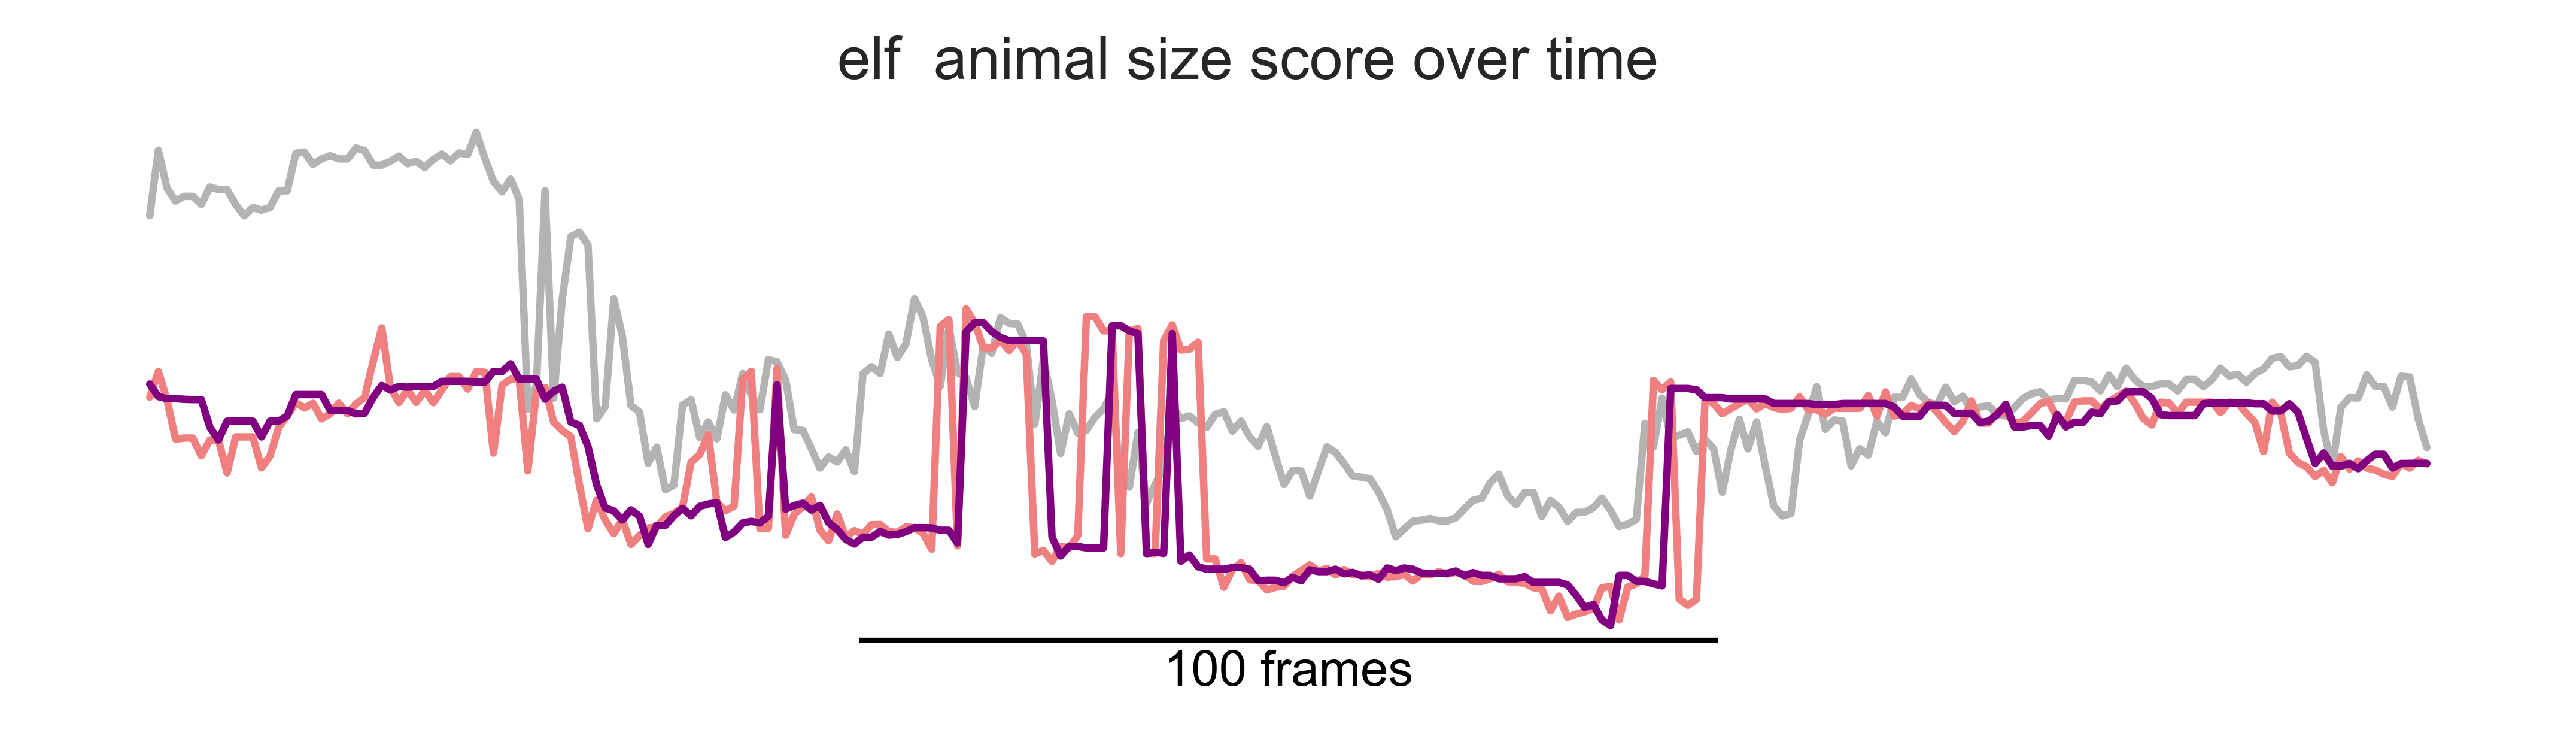

In [11]:
plot_adaptation_score_for_quadruped(square_root_areas_before_adapt_elf , square_root_areas_post_adapt_elf, square_root_areas_filtered_post_adapt_elf,'animal size', 'elf' )


In [17]:
import cv2
import os

def extract_frames(video_path):
    # Ensure the video file exists
    if not os.path.exists(video_path):
        return

    # Load the video
    video = cv2.VideoCapture(video_path)

    # Get the video's basename and directory to construct output path
    video_dir, video_filename = os.path.split(video_path)
    video_basename = os.path.splitext(video_filename)[0]

    # Initialize frame counter
    count = 0

    success, image = video.read()
    while success:
        # Construct output path for each frame
        frame_filename = f"{video_basename}_frame_{count}.png"
        frame_path = os.path.join(video_dir, frame_filename)
        
        # Write frame to a PNG image
        cv2.imwrite(frame_path, image)
        
        success, image = video.read()
        count += 1


In [122]:
dog_frame_index = 30
elf_frame_index = 100
dog_frame = f'quadruped_video_imgs/black_dog/black_dog_frame_{dog_frame_index}.png'
elf_frame = f'quadruped_video_imgs/elf/elf_frame_{elf_frame_index}.png'

In [131]:
def plot_keypoints(image, keypoints, kpt_colors, frame_index, last_n=5, title = 'temp.png'):
    # Ensure frame index is valid
    if not (0 <= frame_index < len(keypoints)):
        print(f"Invalid frame index: {frame_index}")
        return

    # Read image
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Create a new figure and show the image
    plt.figure()
    plt.imshow(img)

    kpt_colors = [[255.0, 0.0, 0.0], [255.0, 39.63408568671726, 0.0], [255.0, 79.26817137343453, 0.0], [255.0, 118.9022570601518, 0.0], [255.0, 158.53634274686905, 0.0], [255.0, 198.17042843358632, 0.0], [255.0, 237.8045141203036, 0.0], [232.56140019297916, 255.0, 0.0], [192.92731450626187, 255.0, 0.0], [153.2932288195446, 255.0, 0.0], [113.65914313282731, 255.0, 0.0], [74.02505744611004, 255.0, 0.0], [34.390971759392784, 255.0, 0.0], [3.5647953575585385, 255.0, 8.807909284882923], [0.0, 255.0, 44.87701729490043], [0.0, 255.0, 84.51085328820125], [0.0, 255.0, 124.14468928150207], [0.0, 255.0, 163.77852527480275], [0.0, 255.0, 203.4123612681037], [0.0, 255.0, 243.04619726140453], [255, 220, 0], [255, 255, 0], [255, 165, 0], [255, 150, 0], [0.0, 68.78344961404169, 255.0], [0.0, 29.14936392732455, 255.0], [10.484721759392611, 0.0, 255.0], [50.11880744611004, 0.0, 255.0], [89.75289313282732, 0.0, 255.0], [129.38697881954448, 0.0, 255.0], [169.02106450626192, 0.0, 255.0], [169.02106450626192, 0.0, 255.0], [255.0, 0.0, 142.80850706015173], [169.02106450626192, 0.0, 255.0], [255.0, 0.0, 142.80850706015173], [255.0, 0.0, 142.80850706015173], [255.0, 0.0, 103.17442137343447], [255.0, 0.0, 63.54033568671722], [255.0, 0.0, 23.90625]]
    kpt_colors = np.array(kpt_colors)
    
    kpt_colors = [color[::-1]/255.0 for color in kpt_colors]

    # Get the keypoints for the last_n frames relative to the given frame index
    for i in range(frame_index - last_n + 1, frame_index + 1):
        kpts = keypoints[i, :, :2]  # We take only the first two dimensions for 2D plotting

        # Plot each keypoint
        for kpt, color in zip(kpts, kpt_colors):
            plt.scatter(*kpt, color=color, s= 2)

    plt.savefig(f'{title}.png', transparent = True, dpi = 300)

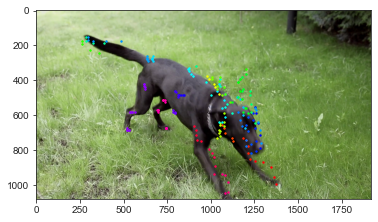

In [132]:
plot_keypoints(dog_frame, before_adapt_black_dog_kpts, kpt_colors,  dog_frame_index, title = 'dog_before_adapt')

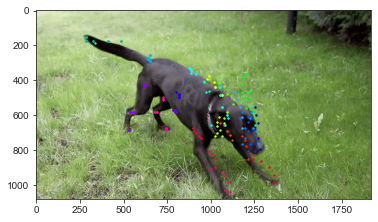

In [133]:
plot_keypoints(dog_frame, post_adapt_black_dog_kpts, kpt_colors,  dog_frame_index, title = 'dog_post_adapt')

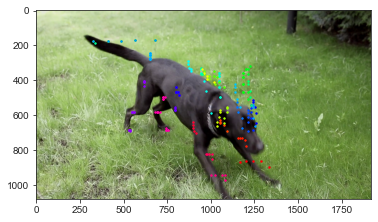

In [134]:
plot_keypoints(dog_frame, filtered_post_adapt_black_dog_kpts, kpt_colors,  dog_frame_index, title = 'dog_filered_post_adapt')

In [135]:
frame_index = 60

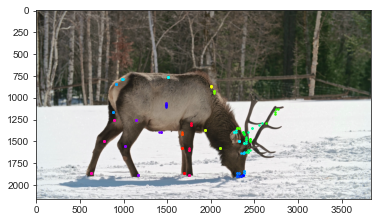

In [136]:
plot_keypoints(elf_frame, before_adapt_elf_kpts, kpt_colors,  elf_frame_index, title = 'elf_before_adapt')

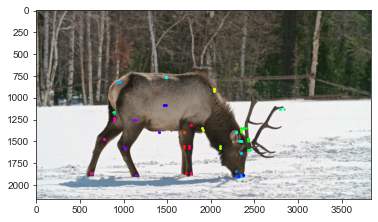

In [137]:
plot_keypoints(elf_frame, post_adapt_elf_kpts, kpt_colors,  elf_frame_index, title = 'elf_post_adapt')

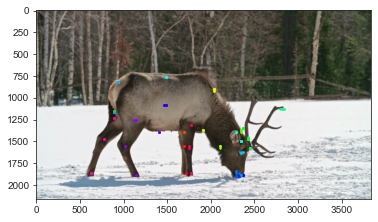

In [138]:
plot_keypoints(elf_frame, filtered_post_adapt_elf_kpts, kpt_colors,  elf_frame_index, title = 'elf_filtered_post_adapt')